In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df1 = pd.read_csv(r"C:\Users\hp_625\Desktop\realKnownCause\realKnownCause\ambient_temperature_system_failure.csv")

In [4]:
df1.isnull().sum()

timestamp    0
value        0
dtype: int64

<AxesSubplot:xlabel='timestamp'>

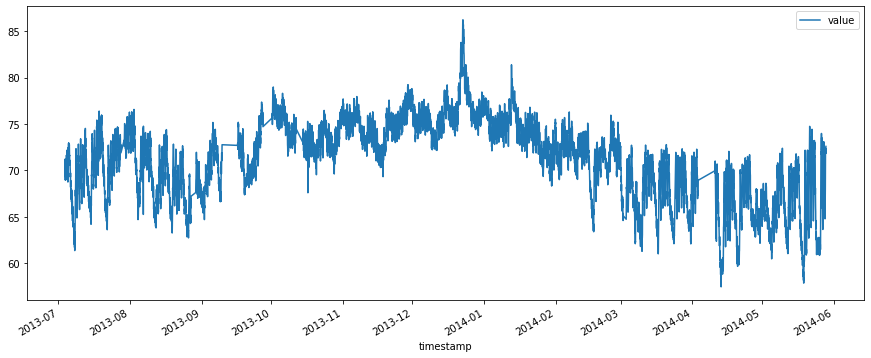

In [5]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1.plot(x='timestamp', figsize=(15, 6))

In [7]:
df = pd.read_csv(r"C:\Users\hp_625\Desktop\realKnownCause\realKnownCause\ambient_temperature_system_failure.csv")

In [8]:
df2=df["timestamp"].str.split(' ',expand=True)
df2.columns=['date','hour']
final_df = pd.concat([df,df2],axis=1)

final_df['date'] = pd.to_datetime(final_df['date'])
final_df['dayofweek'] = final_df['date'].apply(lambda time: time.dayofweek)
final_df['isweekend'] = final_df['dayofweek'] >= 5

mask = (pd.to_timedelta(final_df['hour']).between(pd.Timedelta('6h'),pd.Timedelta('18h')))
final_df['daylight'] = np.where(mask, 1, 0)

final_df['year'] = pd.to_datetime(final_df['timestamp']).dt.year
final_df['hour'] = pd.to_datetime(final_df['timestamp']).dt.hour
final_df['month'] = pd.to_datetime(final_df['timestamp']).dt.month

del final_df['date']
final_df

,timestamp,value,hour,dayofweek,isweekend,daylight,year,month
0,2013-07-04 00:00:00,69.880835,0,3,False,0,2013,7
1,2013-07-04 01:00:00,71.220227,1,3,False,0,2013,7
2,2013-07-04 02:00:00,70.877805,2,3,False,0,2013,7
3,2013-07-04 03:00:00,68.959400,3,3,False,0,2013,7
4,2013-07-04 04:00:00,69.283551,4,3,False,0,2013,7
...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,11,2,False,1,2014,5
7263,2014-05-28 12:00:00,72.172956,12,2,False,1,2014,5
7264,2014-05-28 13:00:00,72.046565,13,2,False,1,2014,5
7265,2014-05-28 14:00:00,71.825226,14,2,False,1,2014,5


<AxesSubplot:title={'center':'Value Distribution'}, ylabel='Frequency'>

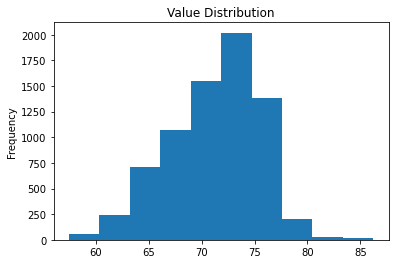

In [9]:
final_df['value'].plot(
    kind='hist',
    title='Value Distribution')

<AxesSubplot:title={'center':'Value Distribution'}>

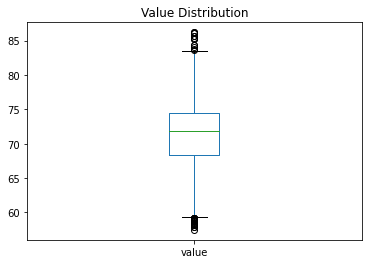

In [10]:
final_df['value'].plot(
        kind='box',
        title='Value Distribution')

<AxesSubplot:title={'center':'Year Distributions of Values'}>

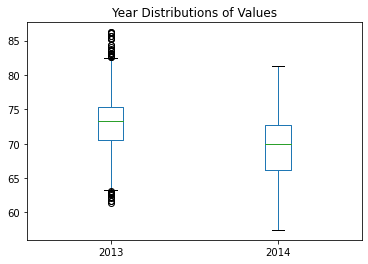

In [11]:
final_df.pivot(columns='year', values='value').plot(
        kind='box',
        title='Year Distributions of Values')

<AxesSubplot:title={'center':'Week Distributions of Values'}>

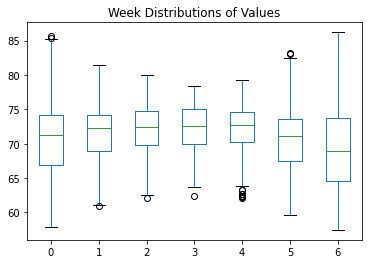

In [12]:
final_df.pivot(columns='dayofweek', values='value').plot(
        kind='box',
        title='Week Distributions of Values')


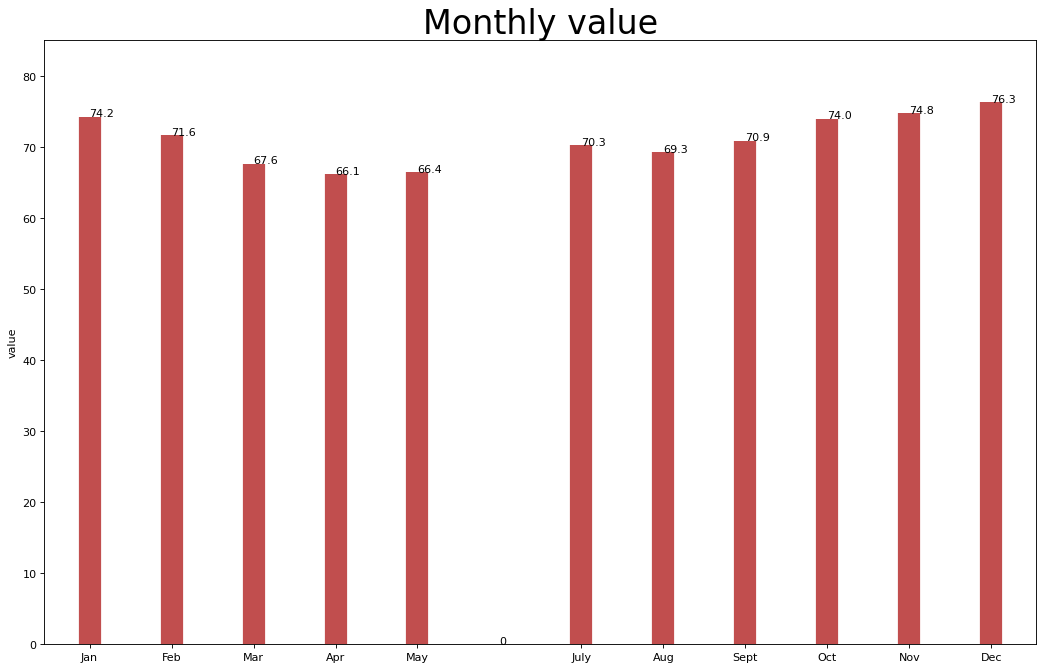

In [13]:
df = final_df[['value', 'month']].groupby('month').apply(lambda x: x.mean())

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.month, ymin=0, ymax=df.value, color='firebrick', alpha=0.8, linewidth=20)

for i, value in enumerate(df.value):
    if i < 5:
        ax.text(i+1, value, round(value, 1))
        
    else:
        ax.text(i+2, value, round(value, 1))
ax.text(6,0,0)
   
ax.set_title('Monthly value', fontdict={'size':30})
ax.set(ylabel='value', ylim=(0, 85))
ax.set_xticks(df.month)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May','July','Aug','Sept','Oct','Nov','Dec'])


plt.show()

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

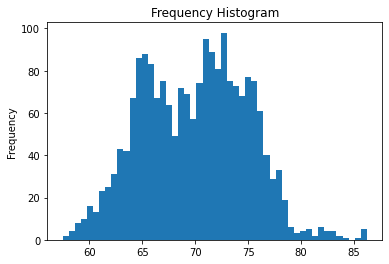

In [21]:
%matplotlib inline

plt.hist(final_df.loc[final_df['isweekend']==True]['value'],bins=50)
plt.gca().set(title="Frequency Histogram", ylabel='Frequency')

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

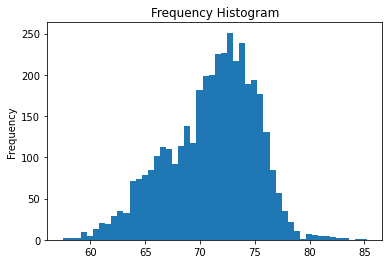

In [22]:
%matplotlib inline

plt.hist(final_df.loc[final_df['daylight']==True]['value'],bins=50)
plt.gca().set(title="Frequency Histogram", ylabel='Frequency')

In [23]:
from sklearn.model_selection import train_test_split
final_df_train,final_df_test = train_test_split(final_df)
final_df_train
final_df_test

,timestamp,value,hour,dayofweek,isweekend,daylight,year,month
5290,2014-02-26 05:00:00,71.519474,5,2,False,0,2014,2
280,2013-07-15 16:00:00,72.967561,16,0,False,1,2013,7
1488,2013-09-07 07:00:00,71.802897,7,5,True,1,2013,9
4672,2014-01-31 11:00:00,71.691143,11,4,False,1,2014,1
1545,2013-09-09 16:00:00,71.901065,16,0,False,1,2013,9
...,...,...,...,...,...,...,...,...
2151,2013-10-18 10:00:00,72.637909,10,4,False,1,2013,10
1061,2013-08-18 13:00:00,64.791385,13,6,True,1,2013,8
3405,2013-12-09 16:00:00,73.279145,16,0,False,1,2013,12
3662,2013-12-20 09:00:00,76.124299,9,4,False,1,2013,12


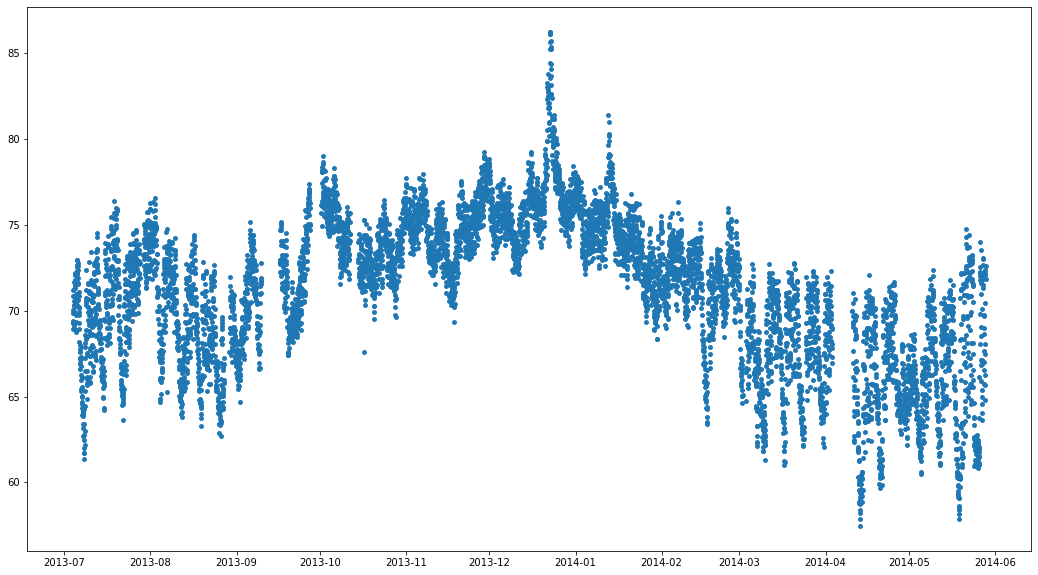

In [28]:
plt.figure(figsize=(18,10))
plt.scatter(pd.to_datetime(final_df['timestamp']), final_df.value, s=15)

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X = final_df.loc[:,'value':'month']
km = KMeans(n_clusters=4,max_iter=300)
km.fit(X)

KMeans(n_clusters=4)

In [32]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents,
             columns = ['principal component 1', 'principal component 2'])
final_Df = pd.concat([principalDf, final_df[['timestamp']]], axis = 1)
final_Df['class'] = km.labels_
final_Df

,principal component 1,principal component 2,timestamp,class
0,-11.576705,0.547812,2013-07-04 00:00:00,0
1,-10.416141,1.501769,2013-07-04 01:00:00,2
2,-9.467563,1.113437,2013-07-04 02:00:00,0
3,-8.717633,-0.532718,2013-07-04 03:00:00,0
4,-7.685036,-0.389045,2013-07-04 04:00:00,0
...,...,...,...,...
7262,-0.390859,0.055909,2014-05-28 11:00:00,0
7263,0.576017,-0.216558,2014-05-28 12:00:00,3
7264,1.551825,-0.432471,2014-05-28 13:00:00,3
7265,2.515665,-0.724164,2014-05-28 14:00:00,3


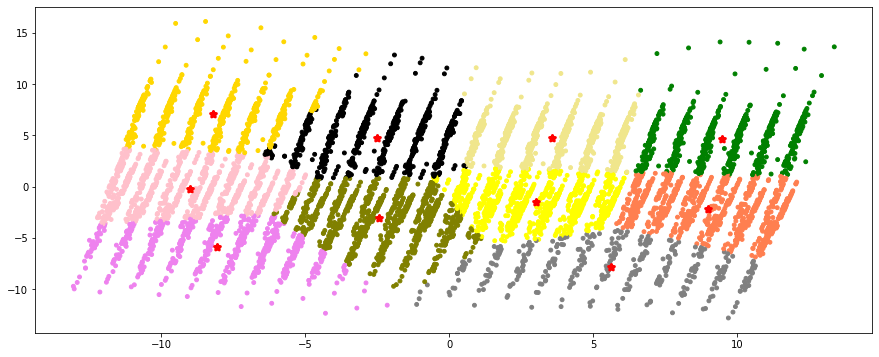

In [33]:
km1 = KMeans(n_clusters=10)
km1.fit(principalComponents)
centroid = km1.cluster_centers_

colormap = np.array(['coral', 'olive','gold','khaki','violet','green','grey','yellow','black','pink'])
plt.figure(figsize=(15,6))
plt.scatter(principalComponents[:,0],principalComponents[:,1], c=colormap[km1.labels_], s=15)
plt.scatter(centroid[:, 0], centroid[:, 1], marker="*", linewidths=3, color="r")